# 3 Sum

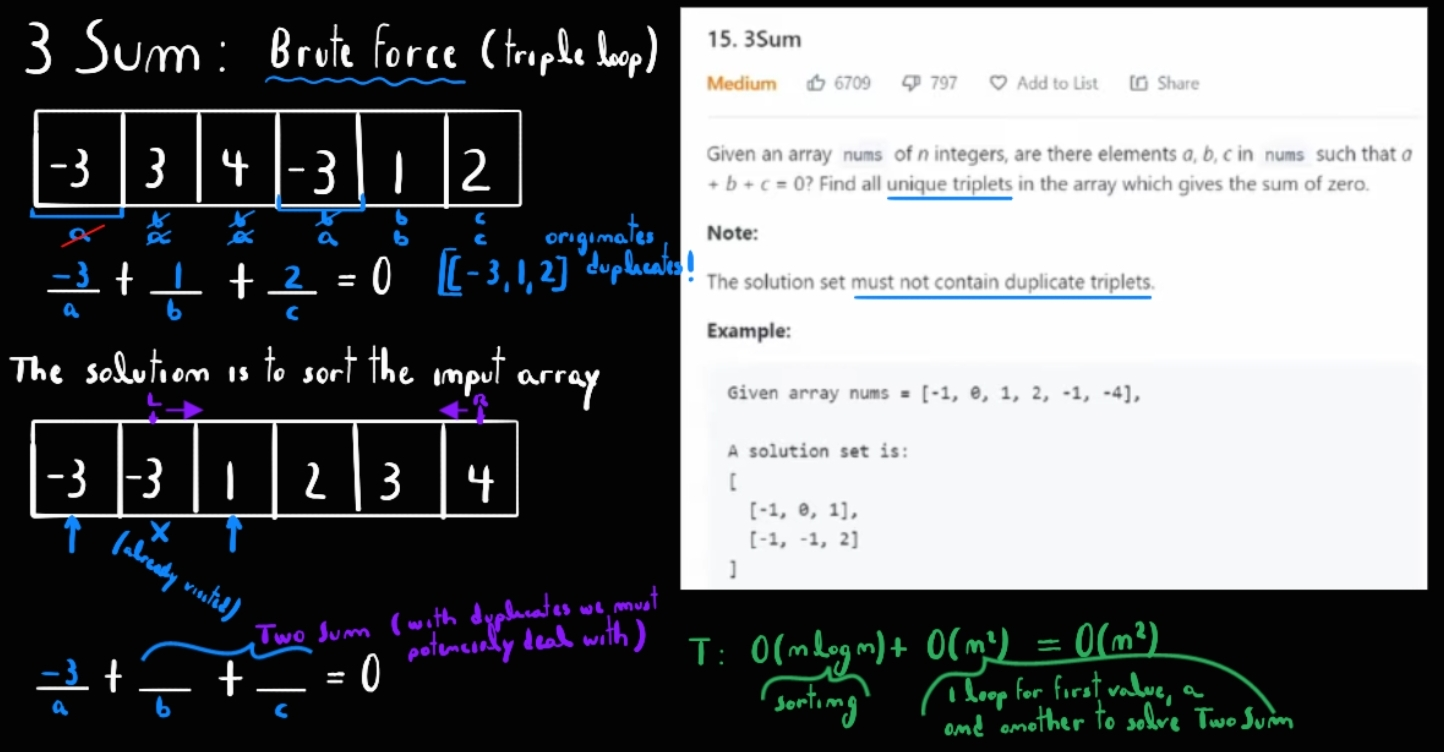

In [ ]:
from typing import List


class Solution:
    def three_sum(self, nums: List[int]) -> List[List[int]]:
        res = []
        nums.sort()
        for i in range(len(nums)):
            if i > 0 and nums[i - 1] == nums[i]:
                continue
            l, r = i + 1, len(nums) - 1
            while l < r:
                curr_sum = nums[i] + nums[l] + nums[r]
                if curr_sum > 0:
                    r -= 1
                elif curr_sum < 0:
                    l += 1
                else:
                    res.append([nums[i], nums[l], nums[r]])
                    # still need to update the pointers
                    # only one of them as the other will
                    # update in the conditions above
                    l += 1
                    # need to update pointers in case we have
                    # duplicates in the two-sum subproblem
                    while nums[l - 1] == nums[l] and l < r:
                        l += 1
        return res


sol = Solution()
sol.three_sum([-3, 3, 4, -3, 1, 2])

[[-3, 1, 2]]

# Longest Palindromic Substring

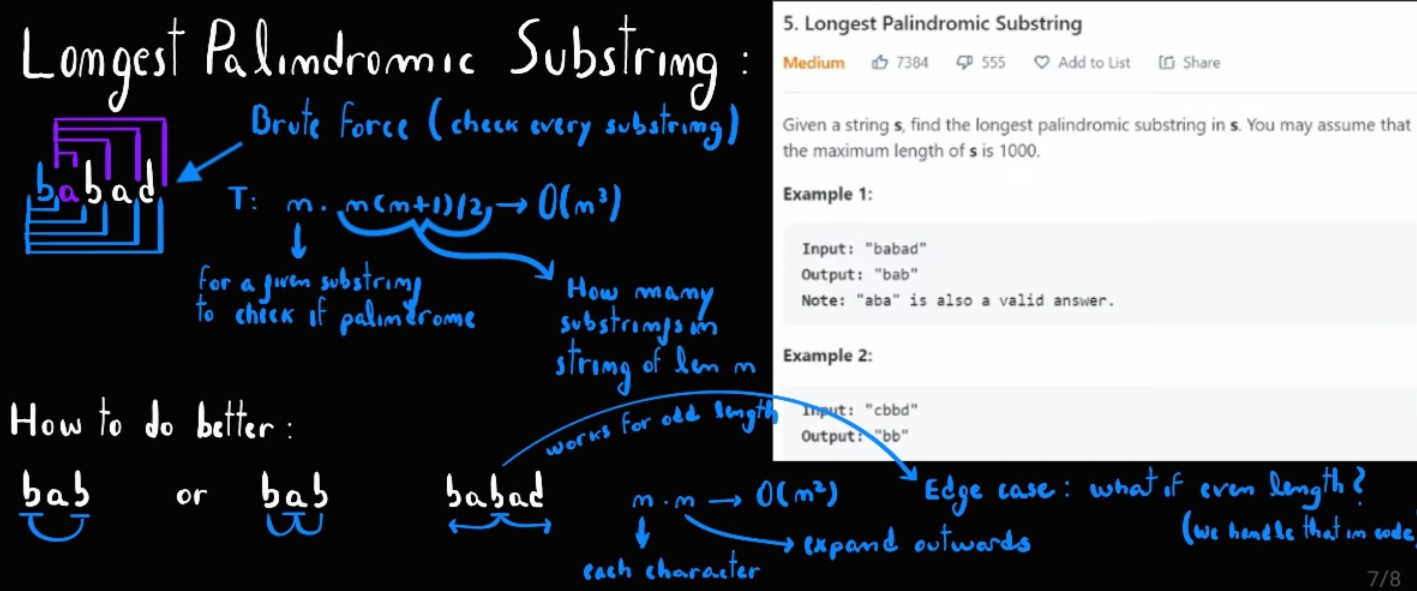

In [ ]:
from typing import List


class Solution:
    def longest_palindrome(self, s: str) -> str:
        res = ""
        res_len = 0
        for i in range(len(s)):
            # odd length
            l, r = i, i
            # check in bounds of string and still palindrome
            while l >= 0 and r < len(s) and s[l] == s[r]:
                # r-l+1 gives len of current str
                if (r - l + 1) > res_len:
                    res = s[l : r + 1]
                    res_len = r - l + 1
                l -= 1
                r += 1
            # even length
            l, r = i, i + 1
            # check in bounds of string and still palindrome
            while l >= 0 and r < len(s) and s[l] == s[r]:
                # r-l+1 gives len of current str
                if (r - l + 1) > res_len:
                    res = s[l : r + 1]
                    res_len = r - l + 1
                l -= 1
                r += 1
        return res


sol = Solution()
sol.longest_palindrome("babad")

'bab'

# Longest Substring without repeating characters

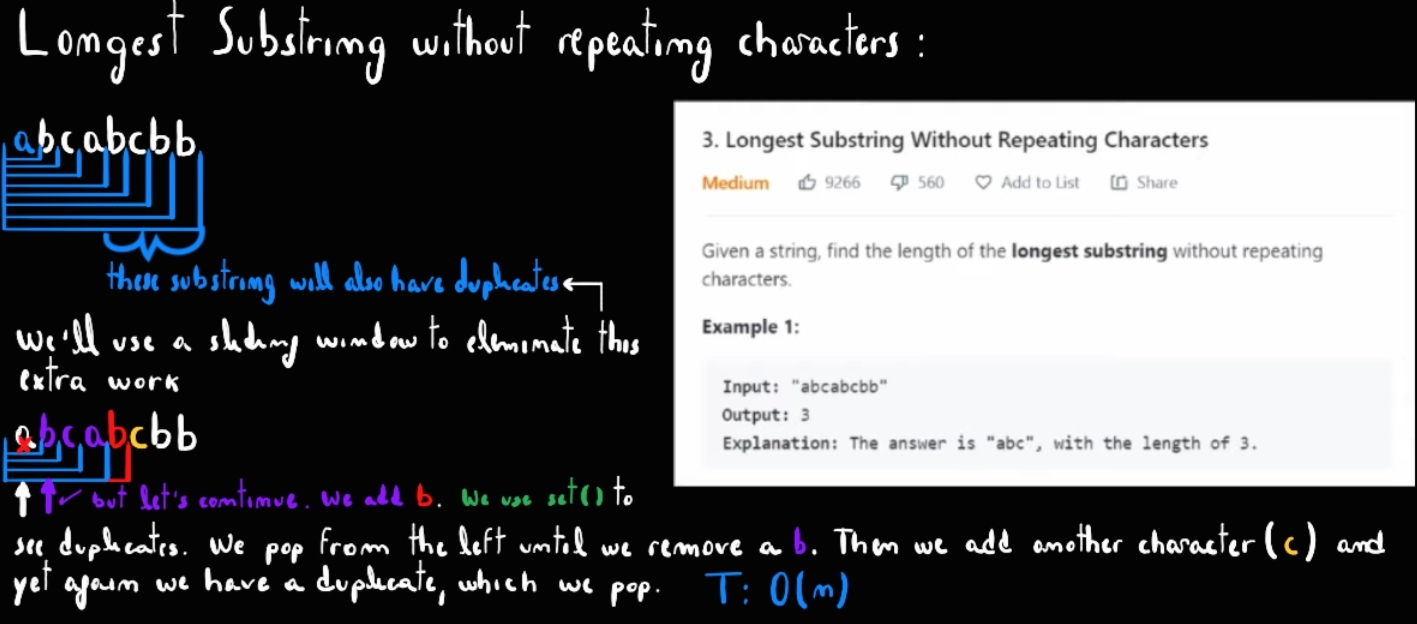

In [ ]:
from typing import List


class Solution:
    def length_longest_substring(self, s: str) -> int:
        char_set = set()
        l = 0
        res = 0
        for r in range(len(s)):
            # detect and remove chars until no more duplicates
            while s[r] in char_set:
                char_set.remove(s[l])
                l += 1
            # after kicking out all duplicates from the set, add
            # the recent char
            char_set.add(s[r])
            res = max(res, r - l + 1)